## EDA

Please fill out:
* Student name: Gideon Miles
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: Daniel 
* Blog post URL:


In [129]:
# imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.metrics import plot_roc_curve

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#reading in the data
TestData=pd.read_csv('Welldatapart1.csv')
TrainingData=pd.read_csv('Welldatapart2.csv')
Wellstatus_Train=pd.read_csv('Wellstatus.csv')


# joining data
Training_Mer=TrainingData.merge(Wellstatus_Train, on = 'id', how='left')

In [3]:
#train test split

X = Training_Mer.drop(['status_group'], axis=1)
y = Training_Mer['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [4]:
##data cleaning

#X_test.isna().sum()
Training_Mer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [5]:
Training_Mer.corr()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
id,1.000000,-0.005321,-0.004692,-0.001348,0.001718,-0.002629,-0.003028,-0.003044,-0.002813,-0.002082
amount_tsh,-0.005321,1.000000,0.076650,0.022134,-0.052670,0.002944,-0.026813,-0.023599,0.016288,0.067915
gps_height,-0.004692,0.076650,1.000000,0.149155,-0.035751,0.007237,-0.183521,-0.171233,0.135003,0.658727
longitude,-0.001348,0.022134,0.149155,1.000000,-0.425802,0.023873,0.034197,0.151398,0.086590,0.396732
latitude,0.001718,-0.052670,-0.035751,-0.425802,1.000000,0.006837,-0.221018,-0.201020,-0.022152,-0.245278
num_private,-0.002629,0.002944,0.007237,0.023873,0.006837,1.000000,-0.020377,-0.004478,0.003818,0.026056
region_code,-0.003028,-0.026813,-0.183521,0.034197,-0.221018,-0.020377,1.000000,0.678602,0.094088,0.031724
district_code,-0.003044,-0.023599,-0.171233,0.151398,-0.201020,-0.004478,0.678602,1.000000,0.061831,0.048315
population,-0.002813,0.016288,0.135003,0.086590,-0.022152,0.003818,0.094088,0.061831,1.000000,0.260910
construction_year,-0.002082,0.067915,0.658727,0.396732,-0.245278,0.026056,0.031724,0.048315,0.260910,1.000000


In [6]:
from IPython.display import Audio 
from IPython.core.display import display

def jobsfinished():
    display(Audio('jobs-finished.mp3', autoplay=True))

ah oh thank goodness an pure numeric
id


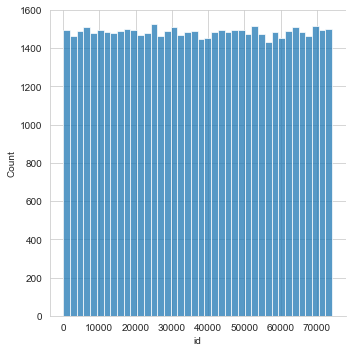

This be a categorical!
date_recorded
Number of Entries  356


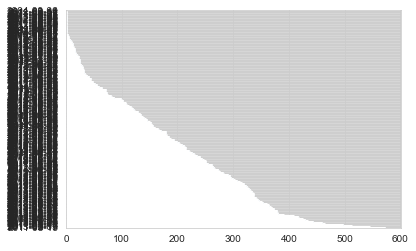

This be a categorical!
funder
Number of Entries  1897


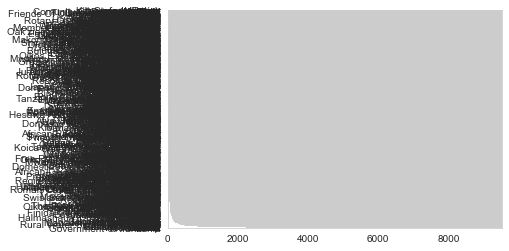

ah oh thank goodness an pure numeric
gps_height


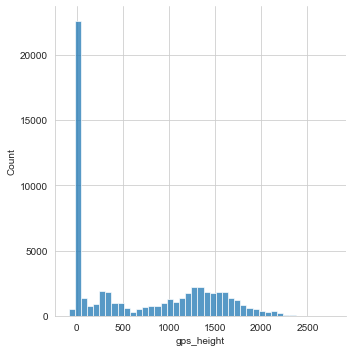

This be a categorical!
installer
Number of Entries  2145


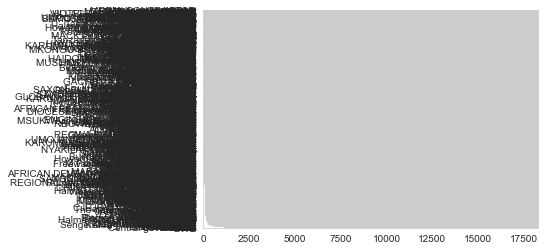

This be a categorical!
wpt_name
Number of Entries  37400


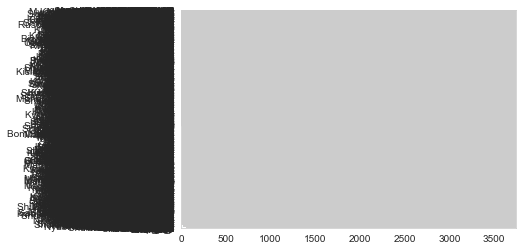

ah oh thank goodness an pure numeric
num_private


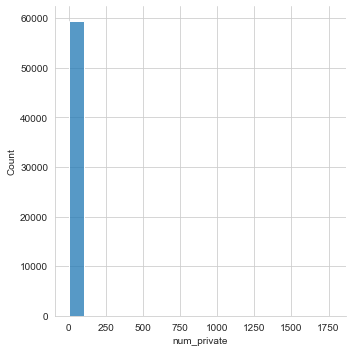

This be a categorical!
basin
Number of Entries  9


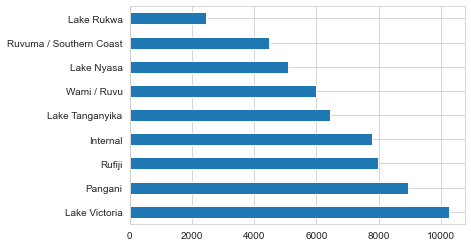

This be a categorical!
subvillage
Number of Entries  19287


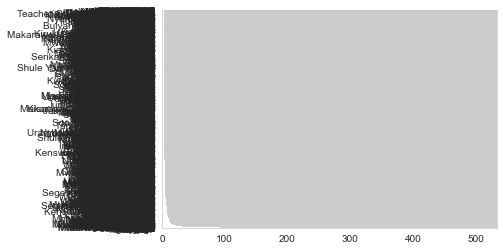

This be a categorical!
region
Number of Entries  21


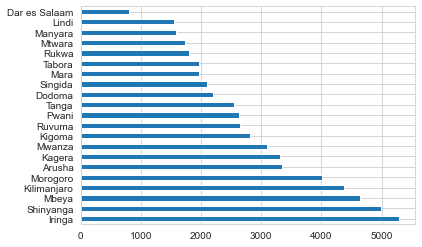

ah oh thank goodness an pure numeric
region_code


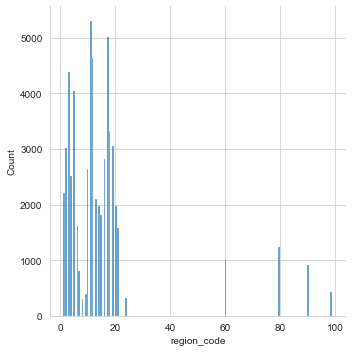

ah oh thank goodness an pure numeric
district_code


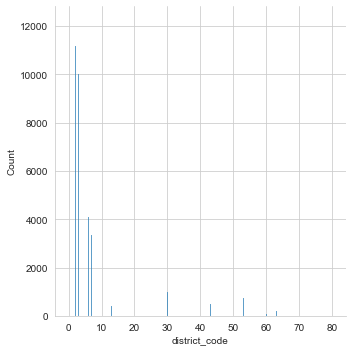

This be a categorical!
lga
Number of Entries  125


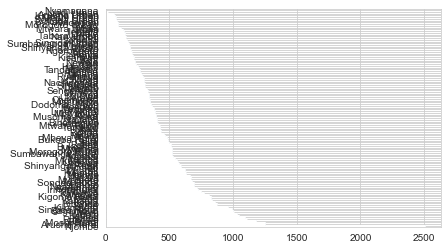

This be a categorical!
ward
Number of Entries  2092


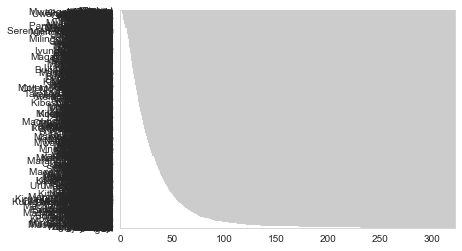

ah oh thank goodness an pure numeric
population


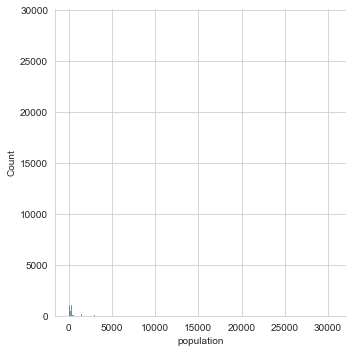

This be a categorical!
public_meeting
Number of Entries  2


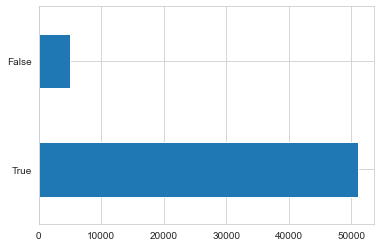

This be a categorical!
recorded_by
Number of Entries  1


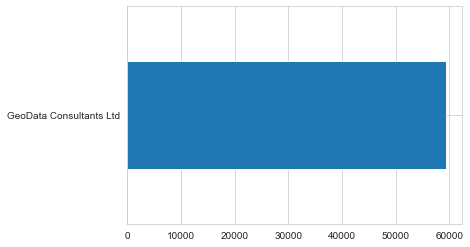

This be a categorical!
scheme_management
Number of Entries  12


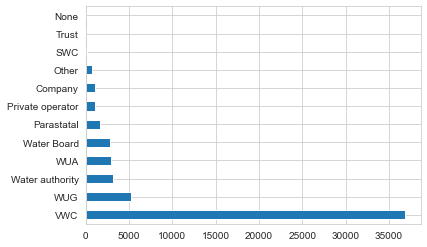

This be a categorical!
scheme_name
Number of Entries  2696


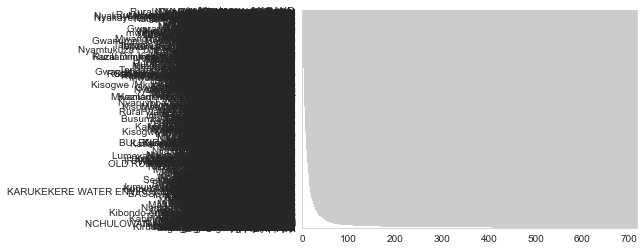

This be a categorical!
permit
Number of Entries  2


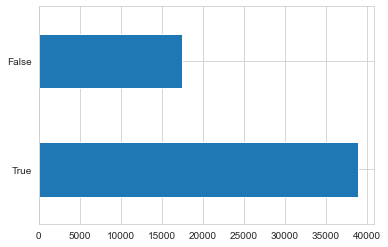

ah oh thank goodness an pure numeric
construction_year


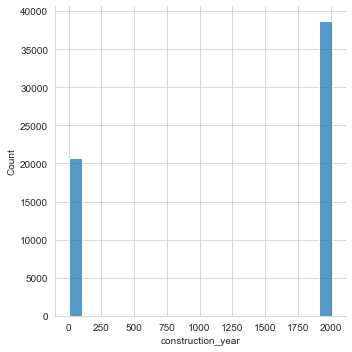

This be a categorical!
extraction_type
Number of Entries  18


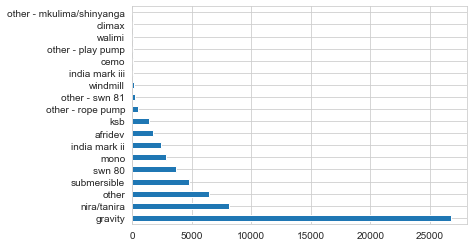

This be a categorical!
extraction_type_group
Number of Entries  13


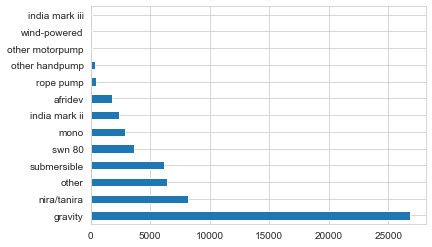

This be a categorical!
extraction_type_class
Number of Entries  7


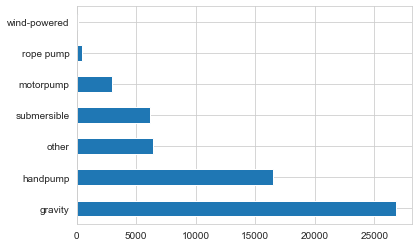

This be a categorical!
management
Number of Entries  12


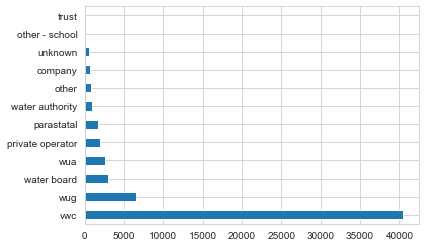

This be a categorical!
management_group
Number of Entries  5


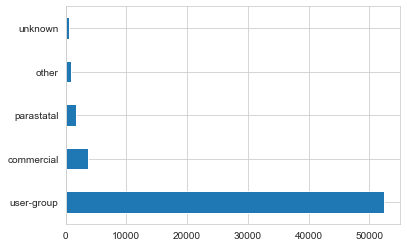

This be a categorical!
payment
Number of Entries  7


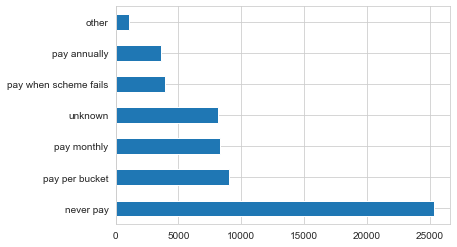

This be a categorical!
payment_type
Number of Entries  7


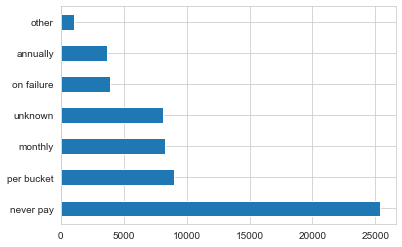

This be a categorical!
water_quality
Number of Entries  8


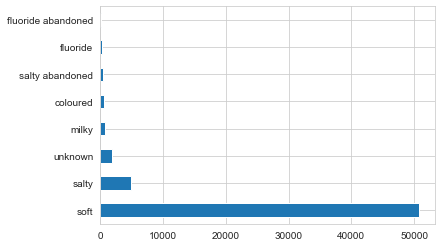

This be a categorical!
quality_group
Number of Entries  6


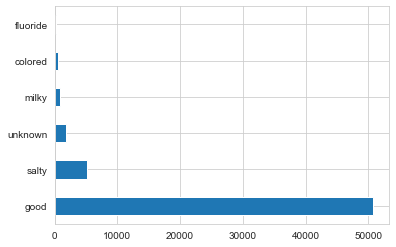

This be a categorical!
quantity
Number of Entries  5


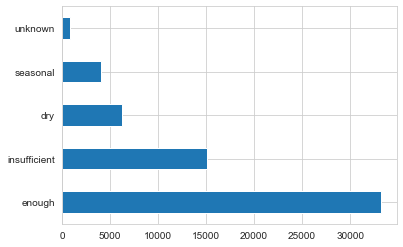

This be a categorical!
quantity_group
Number of Entries  5


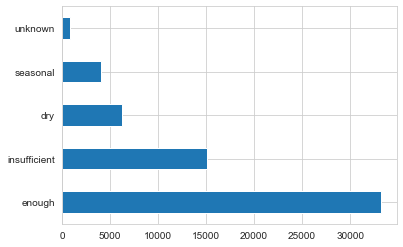

This be a categorical!
source
Number of Entries  10


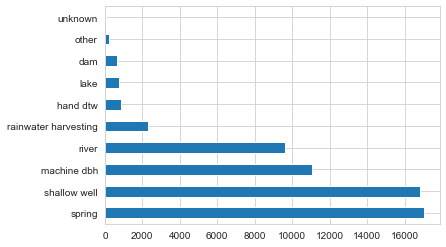

This be a categorical!
source_type
Number of Entries  7


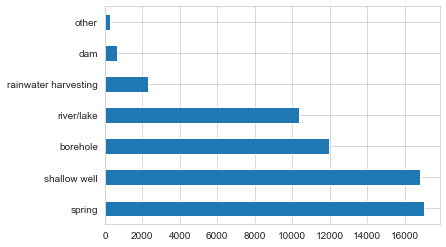

This be a categorical!
source_class
Number of Entries  3


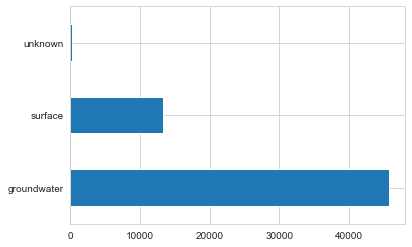

This be a categorical!
waterpoint_type
Number of Entries  7


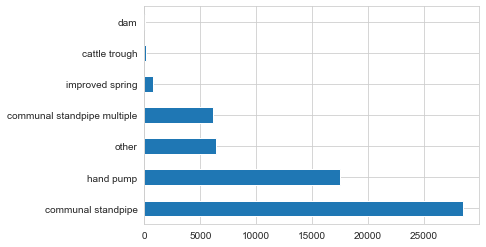

This be a categorical!
waterpoint_type_group
Number of Entries  6


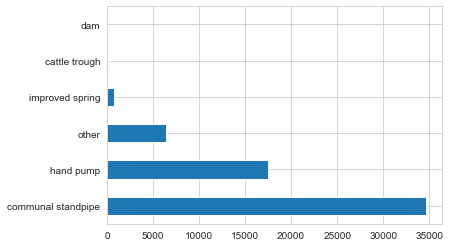

KeyError: 'status_group'

In [7]:
#which categories do I want to keep? Which are signifcant? Do any require specail handling?

sns.set_style('whitegrid')



def explore(df,course):
    for x in course:
        test=df[x]
        if test.dtype == 'object':
            print("This be a categorical!")
            print(x)
            print("Number of Entries ", test.nunique())
            df[x].value_counts().plot(kind='barh')
            plt.show()
            
            
        if test.dtype == 'int64':
            print("ah oh thank goodness an pure numeric")
            print(x)
            sns.displot(df, x=x)
            plt.show()
            
    jobsfinished()
    return "Done" 
            
path=X.keys()
        
explore(X,path)

In [125]:
factors=['funder','gps_height', 'installer','basin','subvillage','region','population','public_meeting','scheme_management','permit','extraction_type','extraction_type_group','extraction_type_class','management','management_group','payment','water_quality','quality_group','quantity','source_class','waterpoint_type']

In [133]:
def catlog(df,col):
    
    for x in col:
        #instantiating logisitic regression
        logreg=LogisticRegression(random_state=56)
        #saving temporary copy of data each time
        temp=df.drop('status_group', axis=1) 
        #Setting Predictor
        X=temp[x]
        #onehotencoding predictor
        X=pd.get_dummies(X)
        #setting target
        y=df[['status_group']]
        #runnign regression
        logreg.fit(X,y)
        #saving predicted outcomes
        temp['pred_outcome']=logreg.predict(X)
        #checking predicted outcomes
        score=logreg.score(X, y)
        print('Prediction for: ',x)
        #        plot_roc_curve(logreg, X, y);
        #plt.show()
        

        
        print(score)
        
    return "Done"

col=['funder','installer','basin','subvillage','region','public_meeting','scheme_management','permit','extraction_type','extraction_type_group','extraction_type_class','management','management_group','payment','water_quality','quality_group','quantity','source_class','waterpoint_type']


catlog(Training_Mer,col)
jobsfinished()

/Users/Gideon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Gideon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Prediction for:  funder
0.6195959595959596


/Users/Gideon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Gideon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Prediction for:  installer
0.6342760942760943


/Users/Gideon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Prediction for:  basin
0.5601010101010101


/Users/Gideon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Gideon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Prediction for:  subvillage
0.7492424242424243


/Users/Gideon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Prediction for:  region
0.5717508417508418


/Users/Gideon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Prediction for:  public_meeting
0.5475757575757576


/Users/Gideon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Gideon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Gideon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was exp

Prediction for:  scheme_management
0.5440235690235691
Prediction for:  permit
0.543080808080808


/Users/Gideon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Gideon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Gideon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was exp

Prediction for:  extraction_type
0.6239057239057239


/Users/Gideon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Gideon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Prediction for:  extraction_type_group
0.6232828282828283


/Users/Gideon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Gideon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Prediction for:  extraction_type_class
0.6231313131313131


/Users/Gideon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Gideon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Prediction for:  management
0.5476936026936027
Prediction for:  management_group
0.5445286195286195


/Users/Gideon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Prediction for:  payment
0.5658417508417508


/Users/Gideon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Gideon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Gideon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was exp

Prediction for:  water_quality
0.5684848484848485


/Users/Gideon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Gideon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Prediction for:  quality_group
0.567037037037037
Prediction for:  quantity
0.6481986531986532


/Users/Gideon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Prediction for:  source_class
0.543080808080808


/Users/Gideon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Prediction for:  waterpoint_type
0.6338552188552189


/Users/Gideon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [149]:
logreg=LogisticRegression(random_state=56)
#saving temporary copy of data each time
temp=Training_Mer.drop('status_group', axis=1)
temp=temp.dropna()

#Setting Predictor
X=temp[['subvillage']].dropna()
y=Training_Mer[['status_group']].dropna()


temp_X_train, temp_X_test, temp_y_train, temp_y_test = train_test_split(X, y, random_state=42)


enc=OneHotEncoder(handle_unknown='ignore')
encoder_df=pd.DataFrame(enc.fit_transform(X).toarray())
final_df = y.join(encoder_df)




In [57]:
def numlog(df,numcol):
    
    for x in col:
        #instantiating logisitic regression
        logreg=LogisticRegression(random_state=56)
        #saving temporary copy of data each time
        temp=df.drop('status_group', axis=1) 
        #Setting Predictor
        X=temp[x]
        #setting target
        y=df[['status_group']]
        #runnign regression
        logreg.fit(X,y)
        #saving predicted outcomes
        temp['pred_outcome']=logreg.predict(X)
        #checking predicted outcomes
        score=logreg.score(X, y)
        print('Prediction for: ',x)
        print(score)
    return "Done"

numcol=['gps_height','population','construction_year','amount_tsh']
catlog(Training_Mer,numcol)
jobsfinished()

/Users/Gideon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Gideon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Prediction for:  gps_height
0.5712457912457912


/Users/Gideon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Gideon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Prediction for:  population
0.565993265993266


/Users/Gideon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Gideon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Gideon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was exp

Prediction for:  construction_year
0.5818686868686869
Prediction for:  amount_tsh
0.5438215488215489


/Users/Gideon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
##instantiating model
#logreg=LogisticRegression(random_state=56)
##saving temporary copy of data each time
#temp=Training_Mer.drop('status_group', axis=1) 
##Setting Predictor
#X=temp['funder']
##onehotencoding predictor
#X=pd.get_dummies(X)
##setting target
#y=Training_Mer[['status_group']]
#runnign regression
#logreg.fit(X,y)
#saving predicted outcomes
#temp['pred_outcome']=logreg.predict(X)
#checking predicted outcomes
#score=logreg.score(X, y)
#print('Prediction for: ','funder')
#print(score)

/Users/Gideon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Gideon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Prediction for:  funder
0.6195959595959596


In [35]:
# making a function to make a series of logisitc regressions using Categorical variables. Comparing scores.

def matters(df,col):
    
    enc = OneHotEncoder(handle_unknown='ignore')
    
    for x in col:
        logreg=LogisticRegression(random_state=56)
        temp=df
        
        X=temp[x]
        
        if X.dtype == 'object':
            X.reshape(-1,1)
            enc.fit(X)
            y=temp[['status_group']]
            logreg.fit(X,y)
            temp['pred_outcome']=logreg.predict(X)
            logodds = logreg.intercept_
            odds = np.exp(logodds)
            prob = odds / (1 + odds)
            print('Prediction for: ',x)
            print(prob)

        else:
            X=temp[[x]]
            y=temp[['status_group']]
            logreg.fit(X,y)
            temp['pred_outcome']=logreg.predict(X)
            logodds = logreg.intercept_
            odds = np.exp(logodds)
            prob = odds / (1 + odds)
            print('Prediction for: ',x)
            print(prob)
     
    
    jobsfinished()
    return "Done"
        

    




In [90]:
Training_Mer['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [36]:
matters(Training_Mer,factors)

AttributeError: 'Series' object has no attribute 'reshape'

In [ ]:
# adding in other Models....


#Can do, multiple logisitic regression, can do....bayesian, can do, 

In [58]:
import geopandas as gpd

In [59]:
world_filepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_filepath)
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [102]:
Tanzania = world.loc[world['name'] == 'Tanzania'] #
boundaries = Tanzania['geometry']


Map=Training_Mer
Map = Map[~(Map == 0).all(axis=1)]
Map

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,geometry
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,POINT (34.93809 -9.85632)
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,POINT (34.69877 -2.14747)
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,POINT (37.46066 -3.82133)
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,POINT (38.48616 -11.15530)
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,POINT (31.13085 -1.82536)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,POINT (37.16981 -3.25385)
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional,POINT (35.24999 -9.07063)
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional,POINT (34.01709 -8.75043)
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional,POINT (35.86132 -6.37857)


In [61]:
import matplotlib as mpl
import seaborn as sns

Text(0.5, 1.0, 'Tanzania Wells')

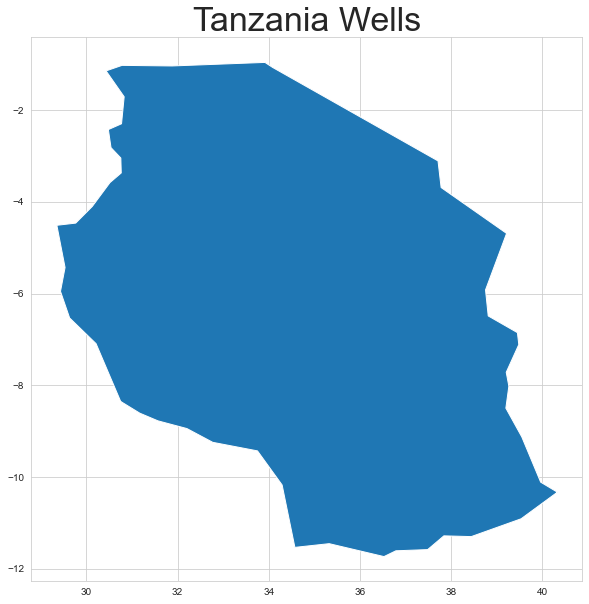

In [64]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,10))
boundaries.plot(ax=ax)
ax.set_title("Tanzania Wells", fontdict={'fontsize':34})

In [67]:
from shapely.geometry import Point, Polygon

/Users/Gideon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot:>

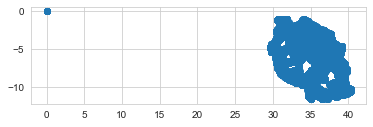

In [82]:
crs={'init':'epsg:4326'}
geometry=[Point(xy) for xy in zip(Map['longitude'],Map['latitude'])]
Geodat=gpd.GeoDataFrame(Map,crs=crs,geometry=geometry)
Geodat.plot()

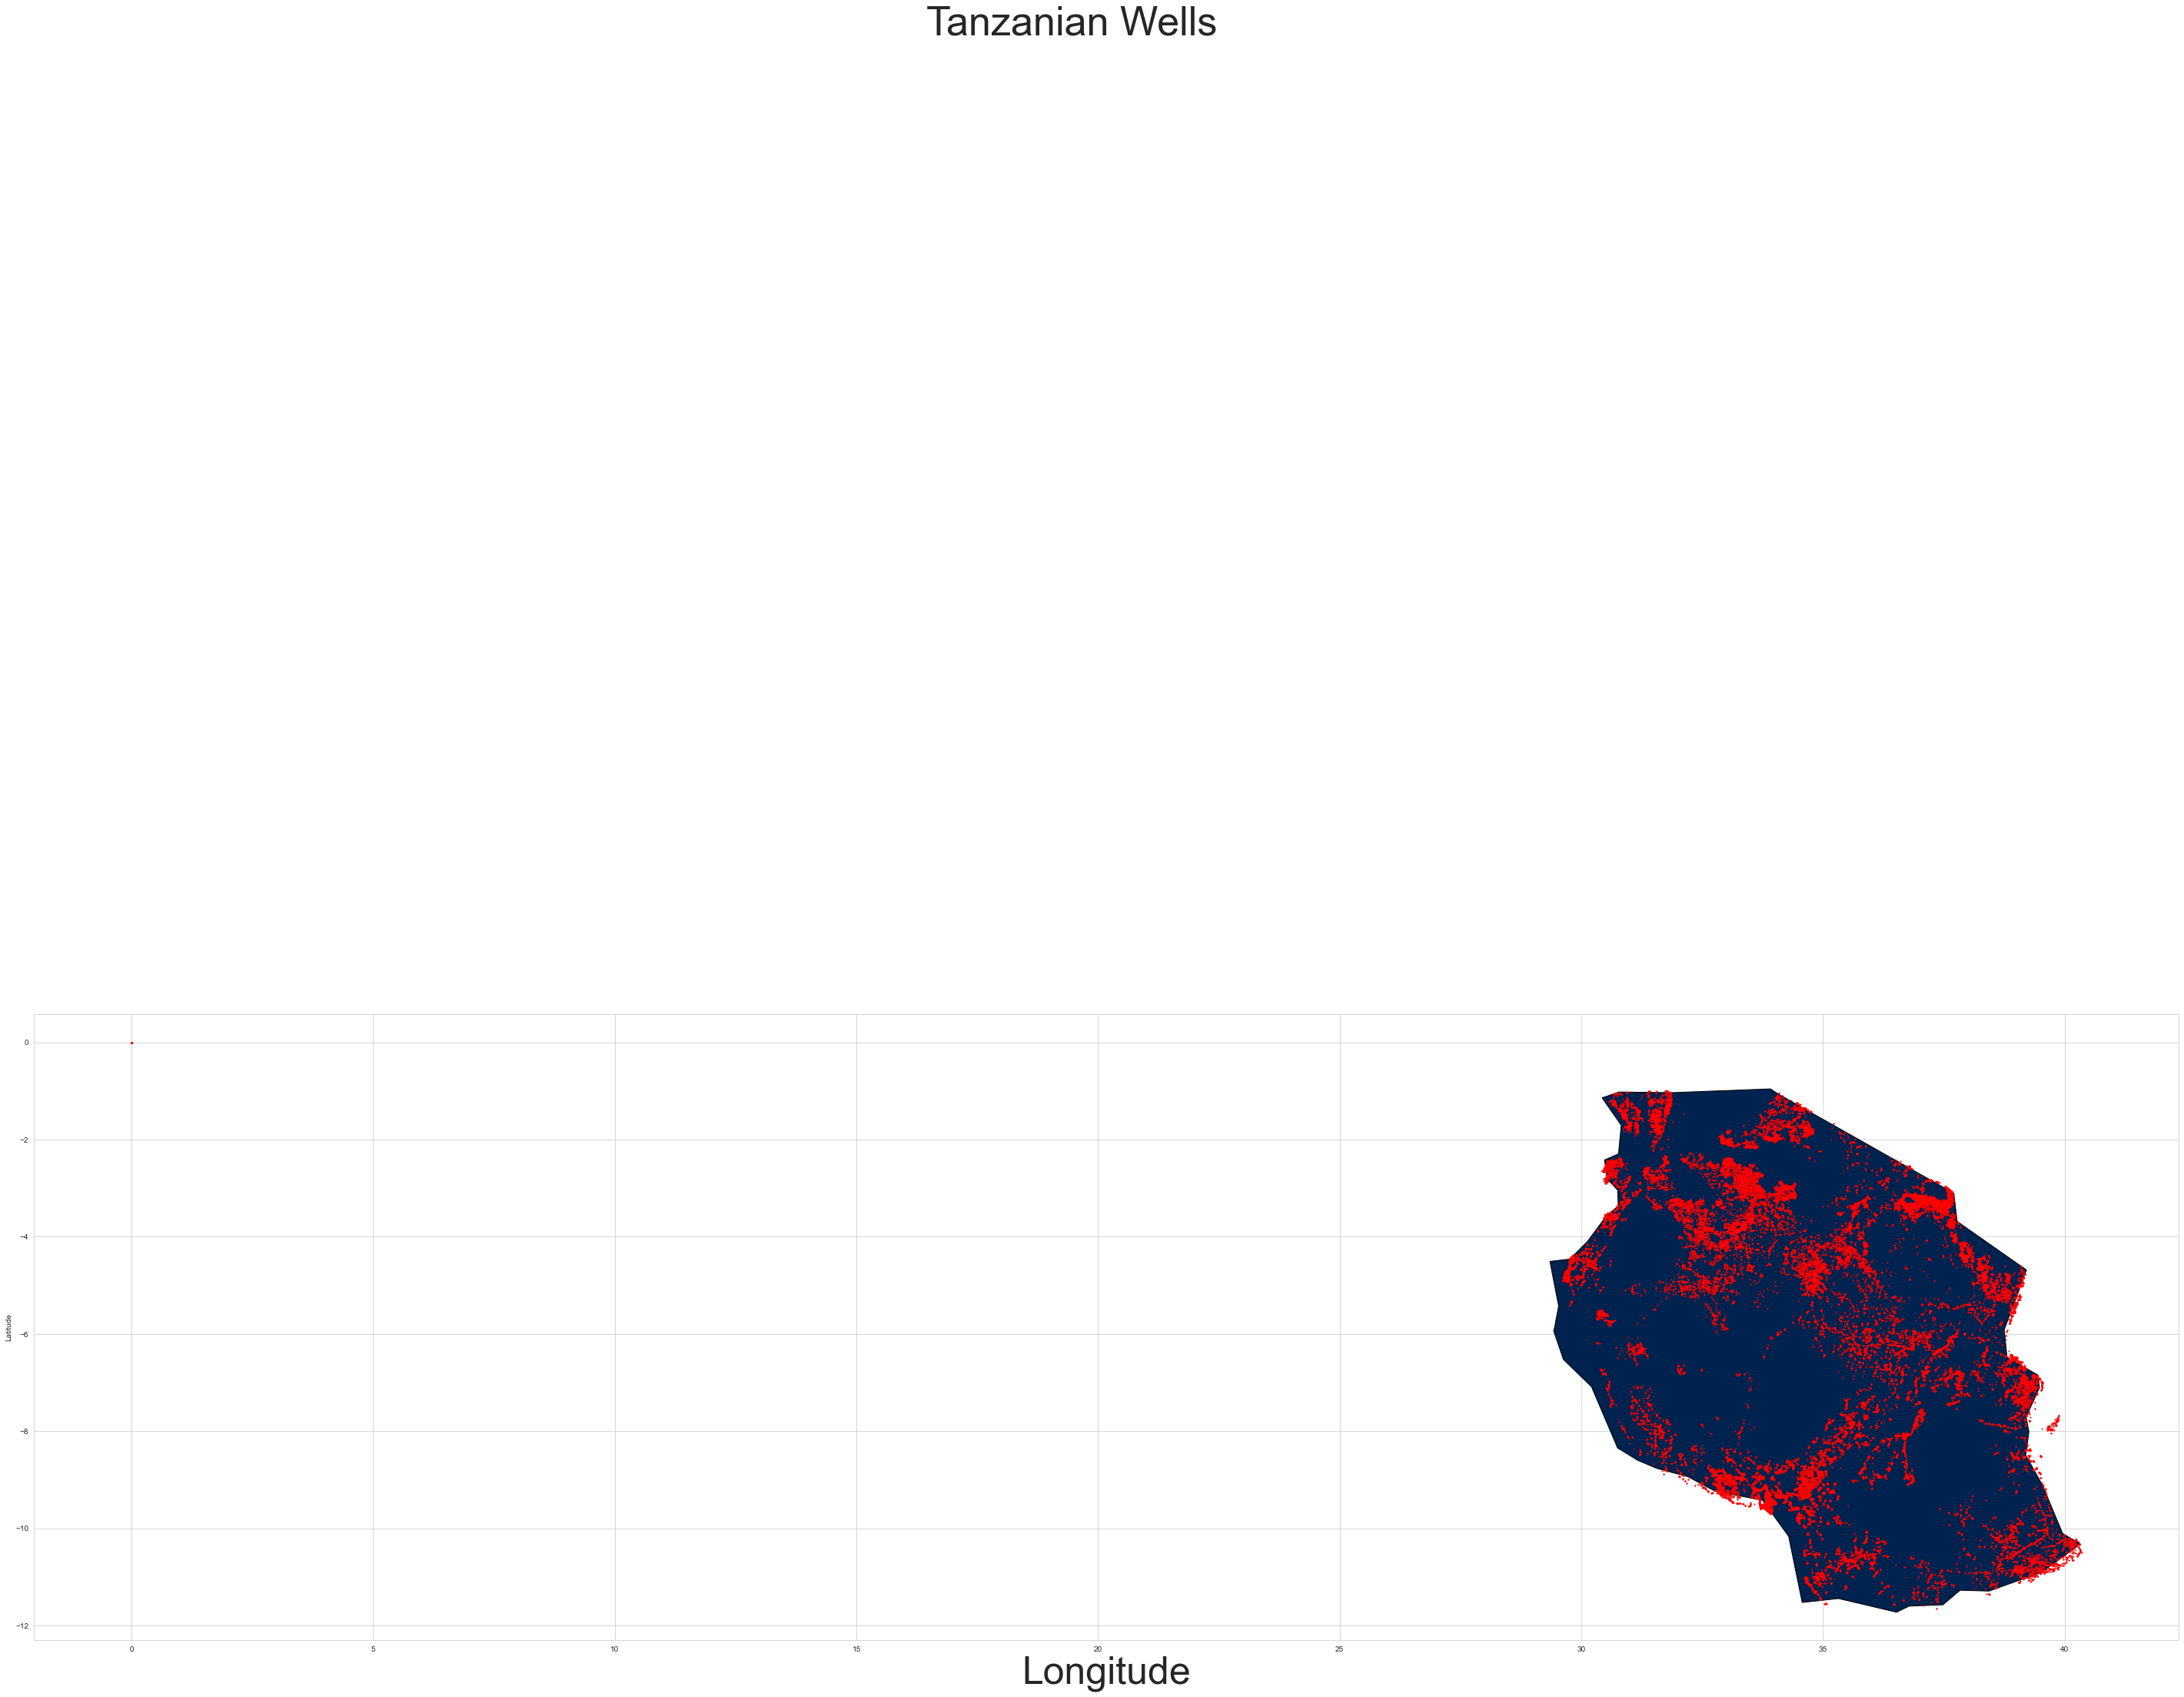

In [88]:
fig, ax =plt.subplots(figsize=(50,50))
boundaries.plot(ax=ax, facecolor='Grey', edgecolor='k', alpha=1, linewidth=1,cmap='cividis')
Geodat.plot(ax=ax, color='red', markersize=1)
fig.suptitle('Tanzanian Wells', fontsize=52)
ax.set_xlabel('Longitude', fontsize=50)
ax.set_ylabel('Latitude', fontsize='medium')
plt.savefig('Tanzanian Wells', dpi='figure')

In [ ]:
# could make a map of various organizations

In [95]:
working=Map[Map['status_group']=='functional']

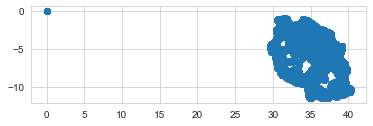

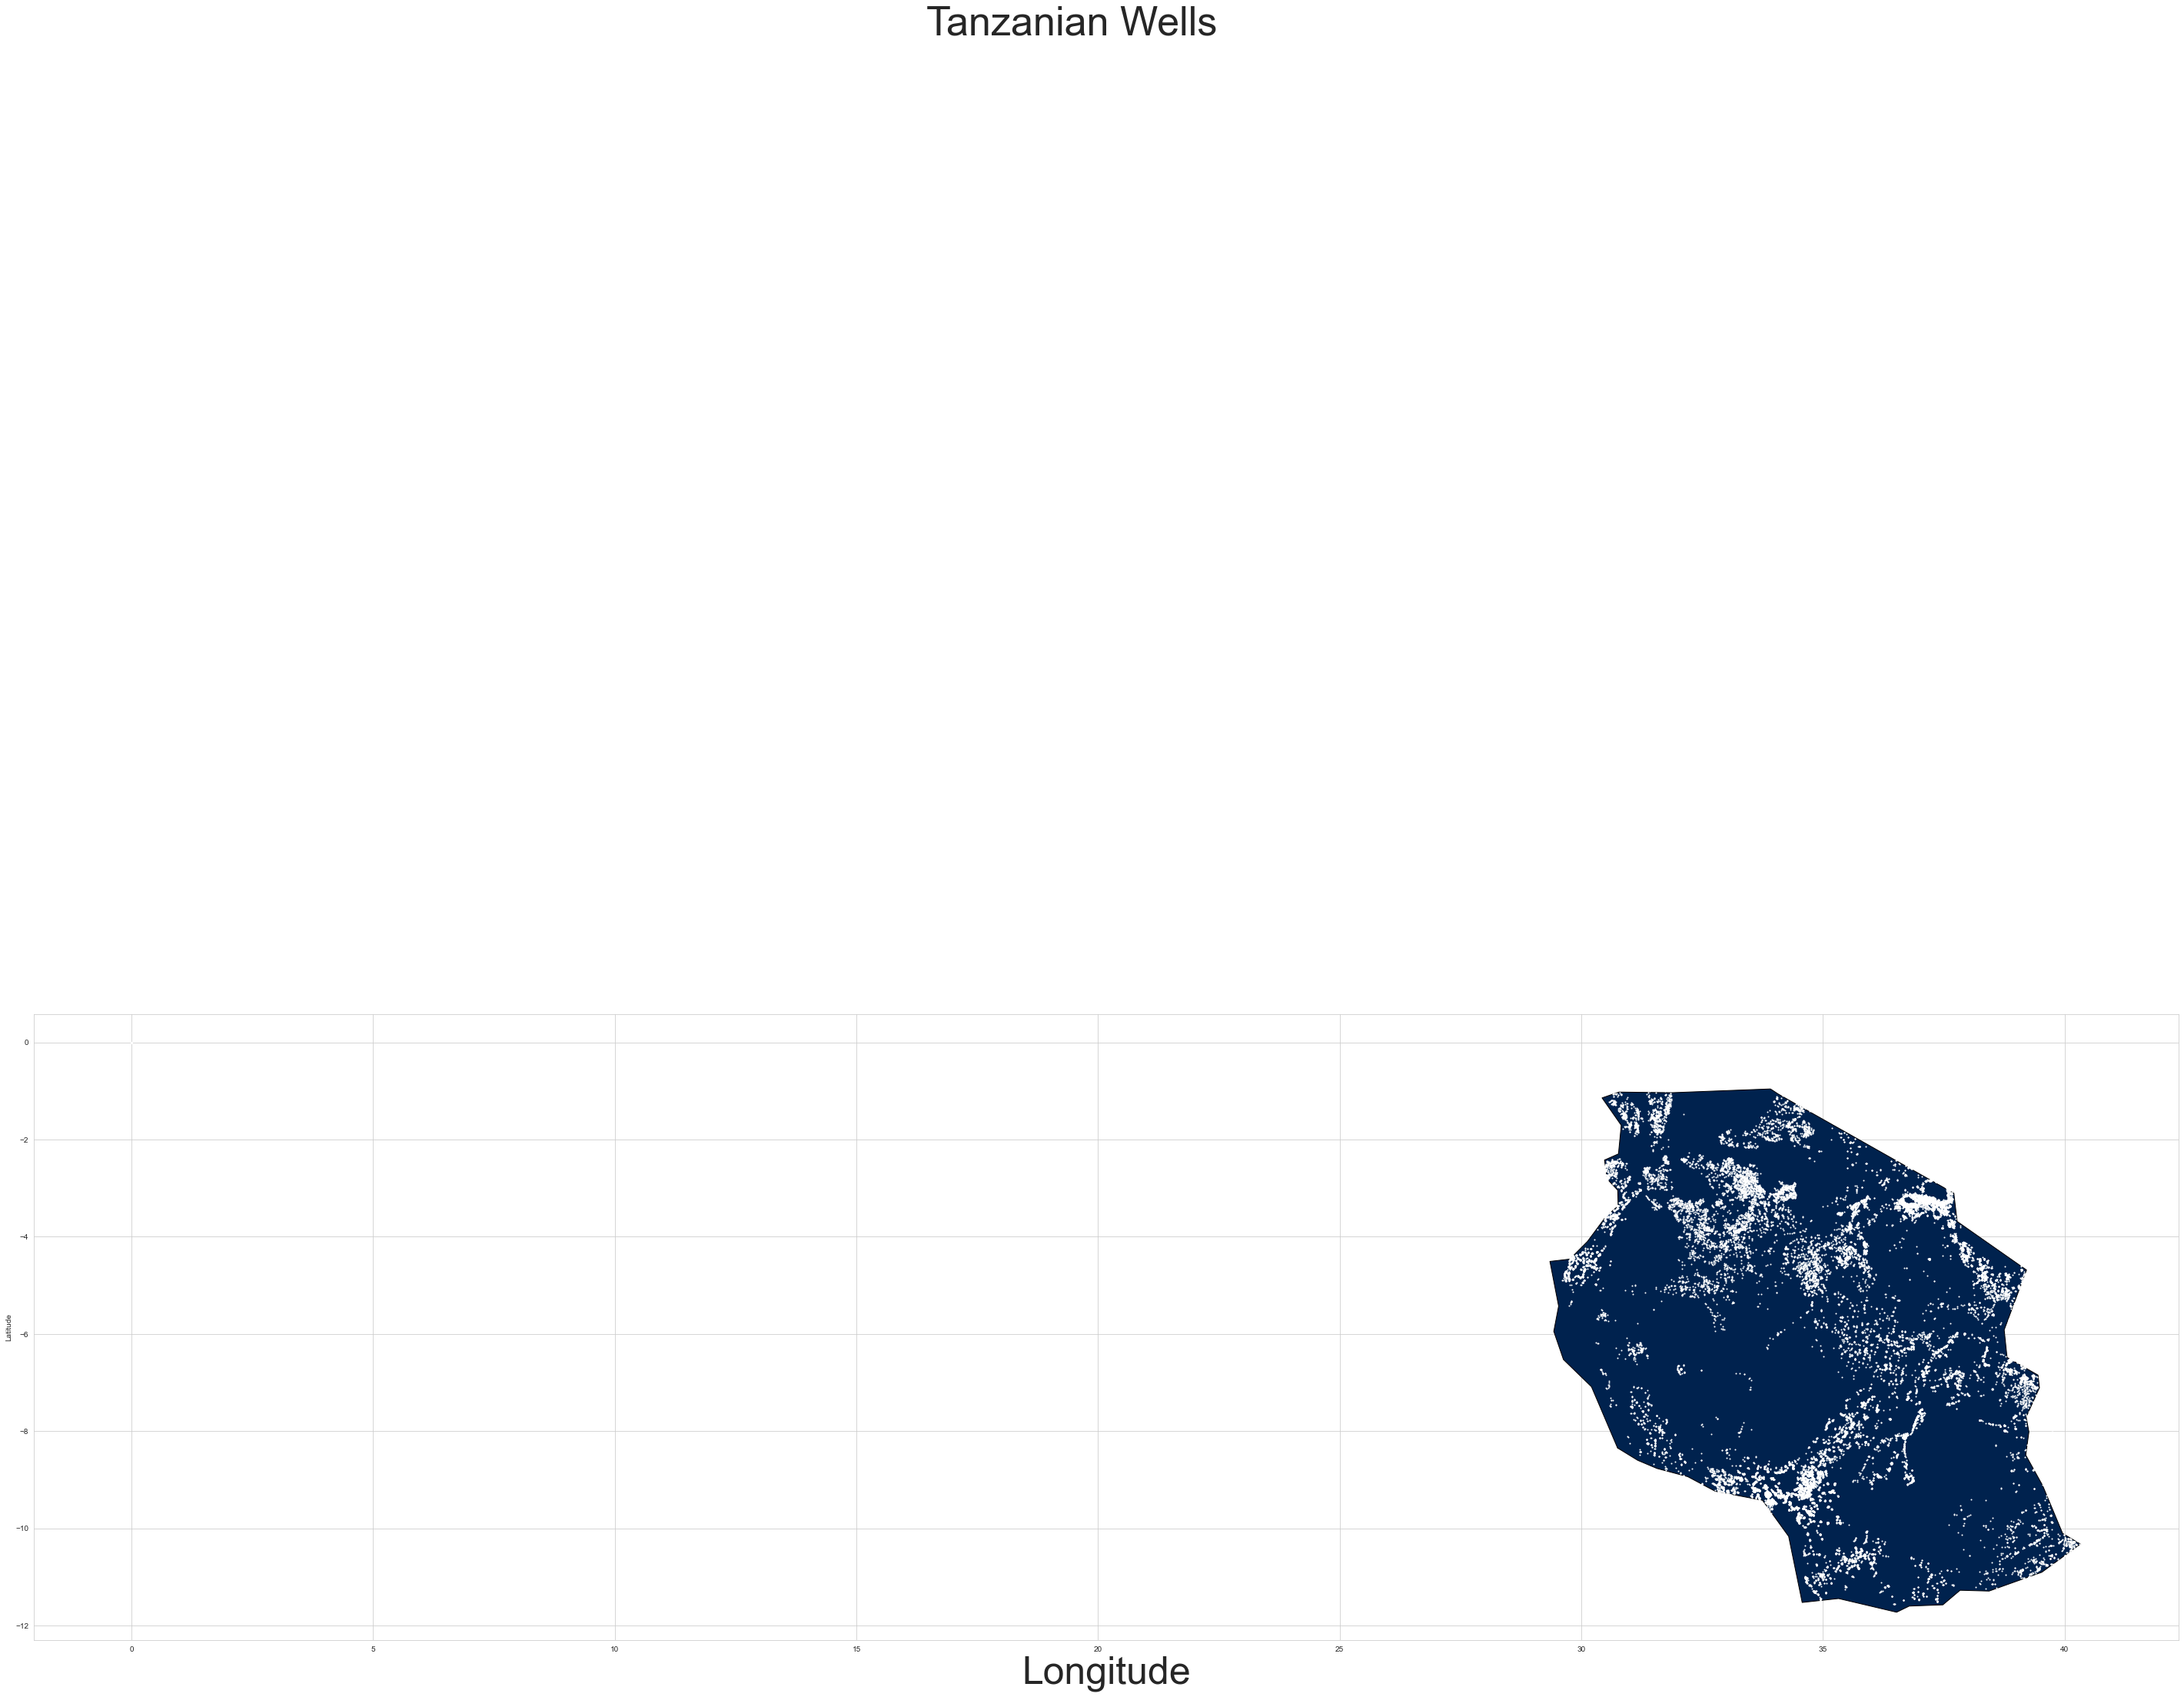

In [105]:
crs={'init':'epsg:4326'}
geometry=[Point(xy) for xy in zip(working['longitude'],working['latitude'])]
Geodat=gpd.GeoDataFrame(working,crs=crs,geometry=geometry)
Geodat.plot()
fig, ax =plt.subplots(figsize=(50,50))
boundaries.plot(ax=ax, facecolor='Grey', edgecolor='k', alpha=1, linewidth=1,cmap='cividis')
Geodat.plot(ax=ax, color='white', markersize=1)
fig.suptitle('Tanzanian Wells', fontsize=52)
ax.set_xlabel('Longitude', fontsize=50)
ax.set_ylabel('Latitude', fontsize='medium')
plt.savefig('Working Tanzanian Wells', dpi='figure')

In [110]:
notworking=Map[Map['status_group']=='non functional']

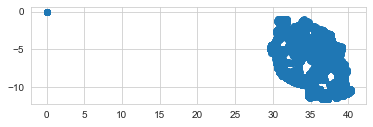

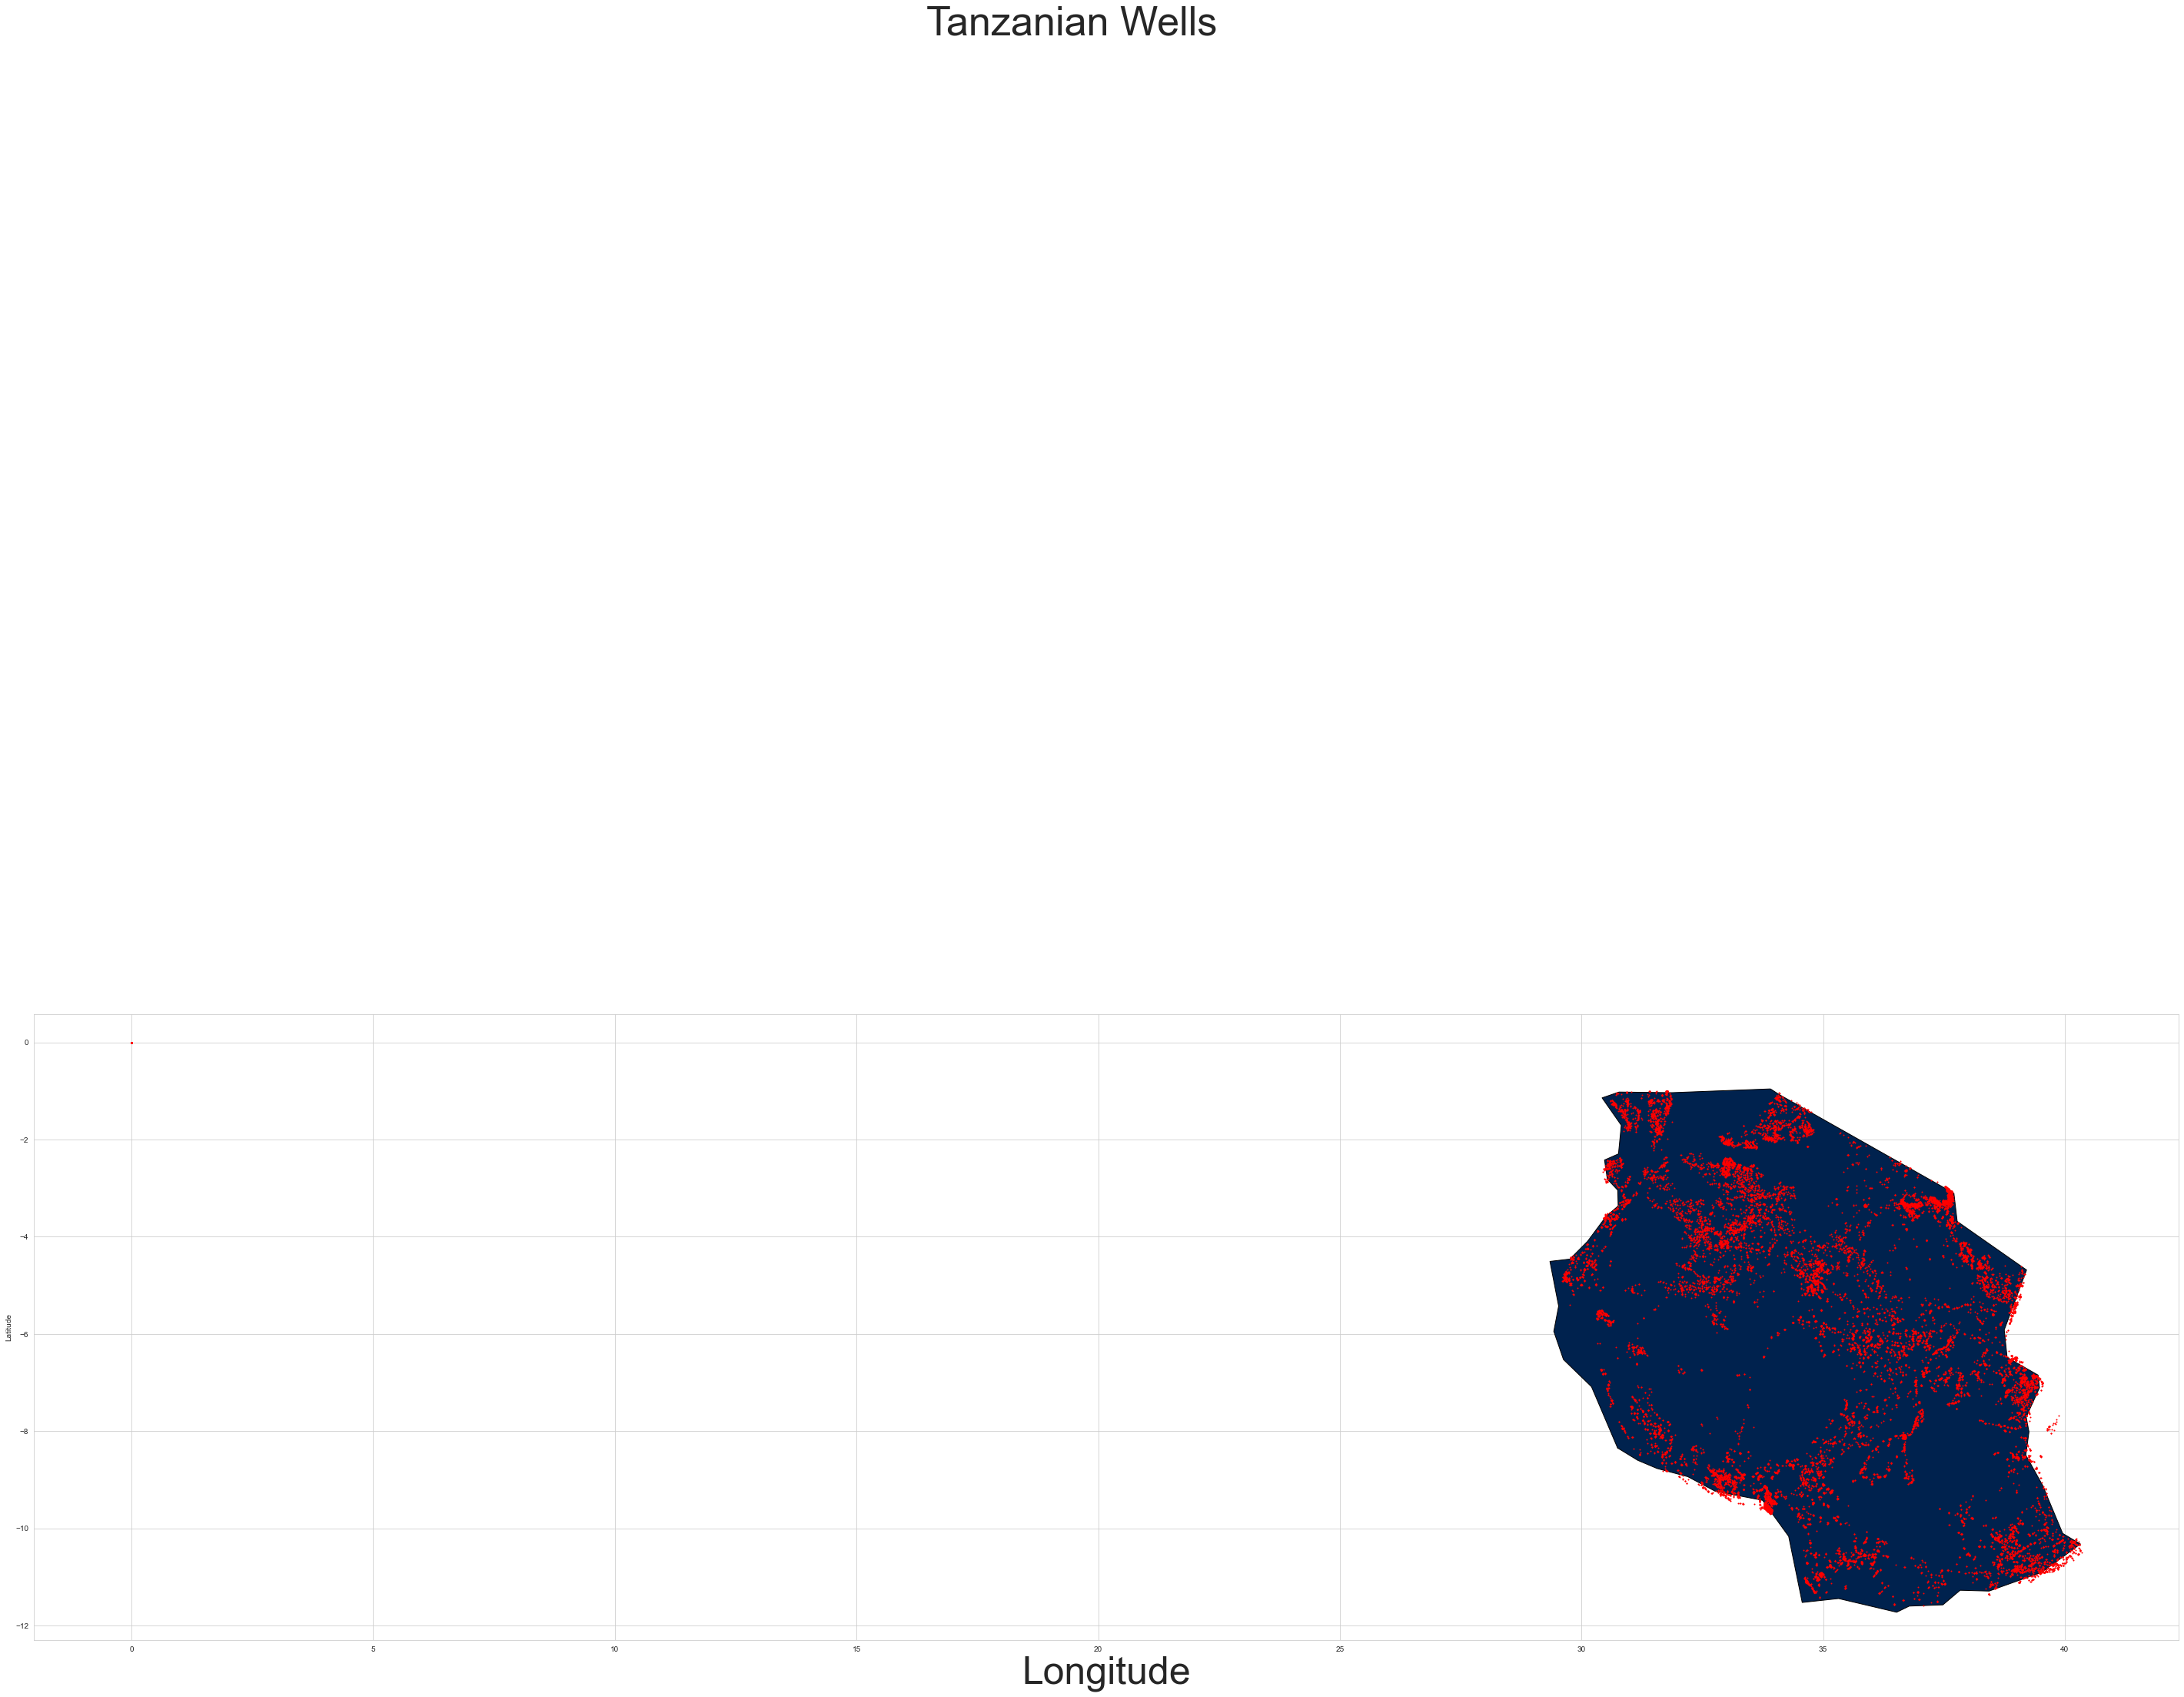

In [111]:
crs={'init':'epsg:4326'}
geometry=[Point(xy) for xy in zip(notworking['longitude'],notworking['latitude'])]
Geodat=gpd.GeoDataFrame(notworking,crs=crs,geometry=geometry)
Geodat.plot()
fig, ax =plt.subplots(figsize=(50,50))
boundaries.plot(ax=ax, facecolor='Grey', edgecolor='k', alpha=1, linewidth=1,cmap='cividis')
Geodat.plot(ax=ax, color='red', markersize=1)
fig.suptitle('Tanzanian Wells', fontsize=52)
ax.set_xlabel('Longitude', fontsize=50)
ax.set_ylabel('Latitude', fontsize='medium')
plt.savefig('Broken Tanzanian Wells', dpi='figure')

In [114]:
working['construction_year'].value_counts()

0       10555
2010     2023
2008     1839
2009     1774
2000     1279
2007     1081
2011      943
2006      883
2003      828
2012      726
2004      704
1999      694
2002      692
1995      593
2005      578
1998      542
1990      466
1978      426
1996      386
1994      380
1984      365
1992      361
2001      331
1985      324
1997      291
1993      285
1980      258
1988      245
1982      236
1974      234
1986      212
1983      187
1972      178
1989      165
1975      144
1987      143
1991      141
2013      102
1970       99
1981       85
1976       85
1971       82
1977       62
1973       55
1979       41
1967       31
1963       31
1960       24
1968       22
1969       15
1965       11
1964        7
1962        7
1966        6
1961        2
Name: construction_year, dtype: int64

In [115]:
notworking['construction_year'].value_counts()

0       8365
2000     676
2008     647
2009     621
1985     537
2010     532
1978     514
1980     493
1972     462
1982     454
2006     453
1990     429
1974     403
2007     390
2003     387
1996     377
2004     349
1984     348
1995     346
2005     344
1998     337
2002     325
1994     315
2012     307
1970     297
1993     289
1997     286
1983     280
1976     277
1975     252
1999     238
1992     238
2011     235
1988     234
1986     188
2001     172
1991     166
1981     142
1979     139
1989     137
1977     130
1987     122
1973     121
2013      73
1960      72
1971      57
1968      51
1963      48
1969      41
1967      40
1964      32
1962      22
1961      16
1966      11
1965       7
Name: construction_year, dtype: int64

In [ ]:
notworking['construction_year'].value_counts()

In [119]:
len(Map['subvillage'].value_counts())

19287

In [126]:
def Nas(df,column):
    for col in column:
        print(col)
        print(df[[col]].value_counts())

In [127]:
Nas(Map,factors)

funder
funder                
Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Mwanamisi Ally               1
Mwanza                       1
Mwingereza                   1
Mwinjuma Mzee                1
Mganga                       1
Length: 1897, dtype: int64
gps_height
gps_height
 0            20438
-15              60
-13              55
-16              55
-20              52
              ...  
 2278             1
 2274             1
 2270             1
 2264             1
-90               1
Length: 2428, dtype: int64
installer
installer       
DWE                 17402
Government           1825
RWE                  1206
Commu                1060
DANIDA               1050
                    ...  
Mwakabalula             1
Mwalimu  Muhenza        1
Mwalimu  Muhenzi        1
Mwamama                 1
Magani                  1
Length: 2145, dtype:

In [154]:
# try GPS_Height without zeros?

Clean=Training_Mer.dropna()
Clean=Clean[~(Clean == 0).all(axis=1)]


In [155]:
Clean['longitude'].value_counts()

0.000000     332
38.340501      2
37.541579      2
37.532778      2
37.543351      2
            ... 
34.908818      1
37.583469      1
37.574559      1
34.540023      1
37.145980      1
Name: longitude, Length: 27278, dtype: int64

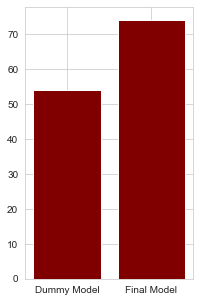

In [170]:
X={'Dummy Model':54,'Final Model':74}
fig=plt.figure(figsize= (3,5))
plt.bar(X.keys(),X.values(), color='maroon', width=.8)
plt.savefig('Model Comparision', dpi='figure')